In [1]:
import set_sys_path

In [2]:
# Load data from task 2
from classy.model.data.read import Reader
reader = Reader()
full_data = reader.load_data("task_2")

In [3]:
full_data

,0,1,2,3,4,5,6,7,8,9,...,speed_limit_60,speed_limit_80,speed_limit_80_lifted,right_of_way_crossing,right_of_way_general,give_way,stop,no_speed_limit_general,turn_right_down,turn_left_down
10711,41,43,46,46,46,46,46,47,47,46,...,3,5,6,11,12,13,14,32,0,39
6694,28,26,25,28,28,24,27,29,28,31,...,3,5,6,11,0,13,14,32,38,39
8968,255,255,255,254,173,64,133,136,59,49,...,3,5,6,11,12,0,14,32,38,39
2739,255,254,252,250,249,250,250,251,253,233,...,3,0,6,11,12,13,14,32,38,39
2724,15,14,15,15,18,20,19,20,19,19,...,3,0,6,11,12,13,14,32,38,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,96,94,93,82,63,56,77,87,64,60,...,3,5,6,11,0,13,14,32,38,39
450,43,42,42,42,43,44,44,44,42,41,...,0,5,6,11,12,13,14,32,38,39
6631,16,16,17,19,21,21,20,20,19,17,...,3,5,6,11,0,13,14,32,38,39
6212,25,21,26,36,42,53,63,60,39,67,...,3,5,6,11,0,13,14,32,38,39


### From the data exploration section, we know that the correct label for an instance is always the one set to 0; vamos!

In [5]:
# To make sure just one more time, row 450 (above) should be speed_limit_60
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Here too we need to split instances and labels into different dataframes
instances_and_atributes = full_data.iloc[:, :2304]
labels = full_data.iloc[:, 2304:]

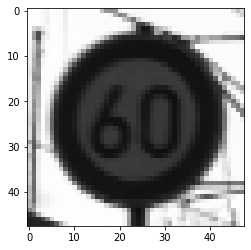

In [7]:
# Let's viz row 450
random_row = instances_and_atributes.sample(1)
image = instances_and_atributes.iloc[450,].to_numpy()
imrs = image.reshape((48,48))
plt.imshow(imrs, cmap='gray', vmin=0, vmax=255)

In [8]:
# Booooom! 😀

Now the actual dimensionality reduction, aka feature selection (unless there's a subtle difference I'm missing?)

Reducing dimensionality increases an (estimator, machine learning algorithm)'s accuracy.

I'm seing that the space around the images is noise and can be removed and retail the meaning of the picture. But it's different spaces for each image, and maybe some don't even have this noise. It has to be done algorithmically, but how?

scikitlearn has algorithms `sklearn.feature_selection` that can help with this.